## Лабораторна робота 5. **Unsupervised Learning**

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

## Кластерування  

В цій лабораторній роботі Ви будете вирішувати задачу класифікації БЕЗ вчителя. 

In [1]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from scipy.cluster.hierarchy import dendrogram, linkage

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline 

import os
import warnings


warnings.filterwarnings('ignore')

**Завдання 0** 

Для початку необхідно завантажити вибірку `Mall_Customers` і перейменувати атрибути `Annual Income (k$)` в `Income`,`Spending Score (1-100)` в `SpendingScore`

In [2]:
customer_set =  pd.read_csv("Mall_Customers.csv")

In [3]:
customer_set

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]

In [4]:
customer_set.rename(columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)' : 'SpendingScore'}, inplace=True)

In [5]:
customer_set.head()

CustomerID  Gender  Age  Income  SpendingScore
0           1    Male   19      15             39
1           2    Male   21      15             81
2           3  Female   20      16              6
3           4  Female   23      16             77
4           5  Female   31      17             40

**Завдання 1** 

Підготовка даних до опрацювання

* подивитись які атрибути містить вибірка; 
* вивести розмірність датасету;
* вивести основну статистичну інформацію по числовим змінним;  
* перевірити на наявність `NaN`.   

In [6]:
customer_set.columns

Index(['CustomerID', 'Gender', 'Age', 'Income', 'SpendingScore'], dtype='object')

In [7]:
customer_set.T.apply(lambda x: x.unique(), axis=1)

CustomerID       [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
Gender                                              [Male, Female]
Age              [19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 2...
Income           [15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 28, 2...
SpendingScore    [39, 81, 6, 77, 40, 76, 94, 3, 72, 14, 99, 15,...
dtype: object

In [8]:
customer_set.dtypes

CustomerID        int64
Gender           object
Age               int64
Income            int64
SpendingScore     int64
dtype: object

In [9]:
customer_set.shape

(200, 5)

In [10]:
customer_set.describe()

CustomerID         Age      Income  SpendingScore
count  200.000000  200.000000  200.000000     200.000000
mean   100.500000   38.850000   60.560000      50.200000
std     57.879185   13.969007   26.264721      25.823522
min      1.000000   18.000000   15.000000       1.000000
25%     50.750000   28.750000   41.500000      34.750000
50%    100.500000   36.000000   61.500000      50.000000
75%    150.250000   49.000000   78.000000      73.000000
max    200.000000   70.000000  137.000000      99.000000

In [11]:
customer_set.isna().sum()

CustomerID       0
Gender           0
Age              0
Income           0
SpendingScore    0
dtype: int64

## EDA Mall Customers

**Завдання 2** 

Як Ви могли помітити по статистичній аналітиці вибірки вона містить змінну `CustomerID`. Ця змінна не впливає на аналіз даних тому її можна видалити.

In [12]:
customer_set = customer_set.drop('CustomerID', axis=1)

In [13]:
customer_set.head()

Gender  Age  Income  SpendingScore
0    Male   19      15             39
1    Male   21      15             81
2  Female   20      16              6
3  Female   23      16             77
4  Female   31      17             40

**Завдання 3** 

Побудувати діаграми розподілу по змінним `Age` , `Income` та `SpendingScore`

<AxesSubplot:xlabel='Age', ylabel='count'>

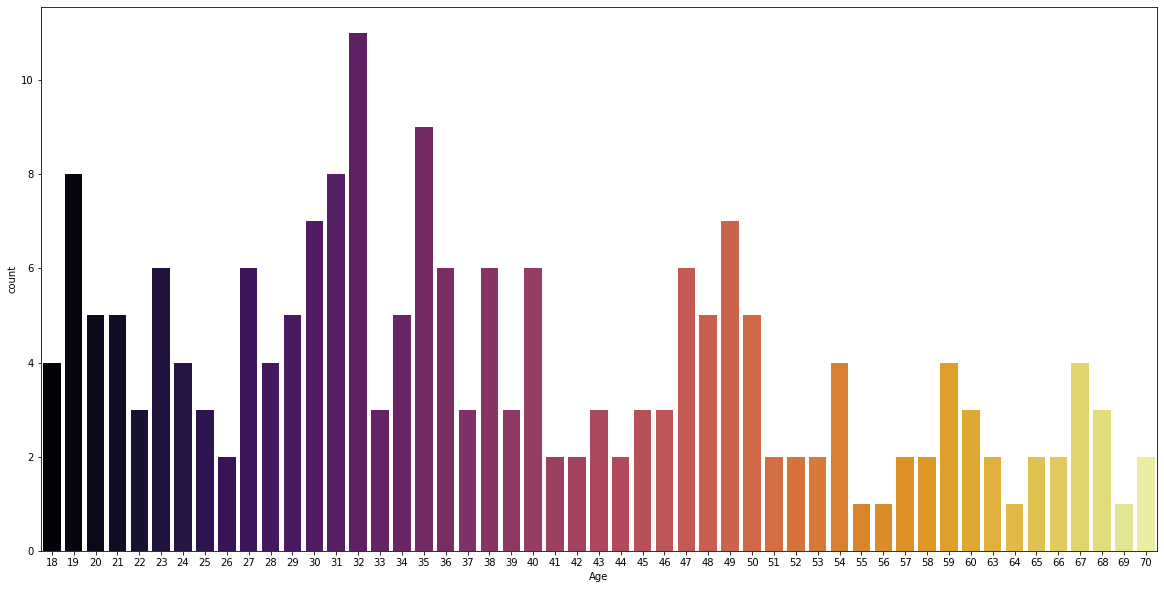

In [14]:
fig = plt.figure(figsize=(20, 10))
sns.countplot(customer_set.Age, palette="inferno")

<AxesSubplot:xlabel='Income', ylabel='count'>

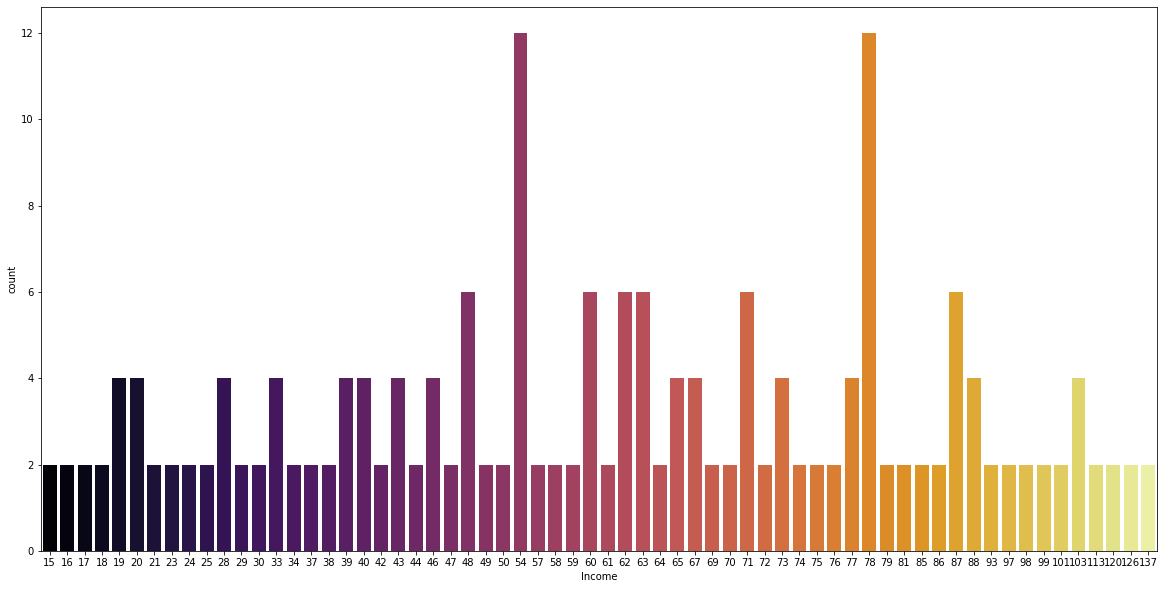

In [15]:
fig = plt.figure(figsize=(20, 10))
sns.countplot(customer_set.Income, palette="inferno")

<AxesSubplot:xlabel='SpendingScore', ylabel='count'>

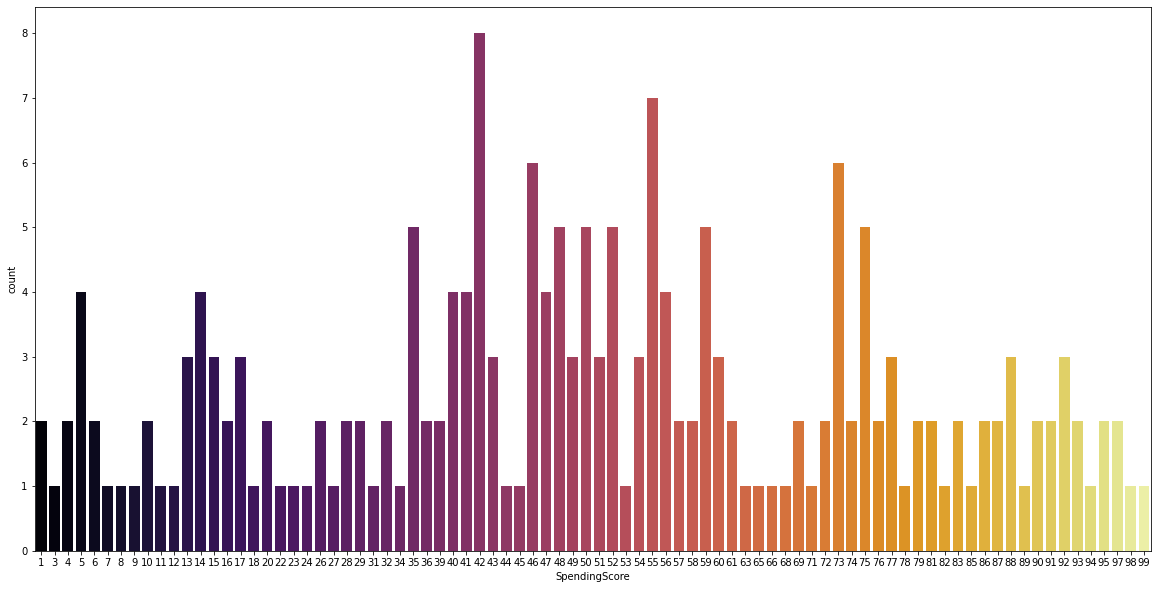

In [16]:
fig = plt.figure(figsize=(20, 10))
sns.countplot(customer_set.SpendingScore, palette="inferno")

**Завдання 4** 

Давайте подивимось на ці змінні `Age` , `Income` та `SpendingScore` відносно змінної `Gender`. 
* Побудуємо `pairplot` по всім змінним відностно змінної `Gender`:  
 
* Побудуємо `pairplot` використовуючи `sns.PairGrid` із заданими `(scatterplot)`, `(kdeplot)` та `(kdeplot, lw=1)` по відповідно правому верхньому куту, діагоналі і лівому нижньому кутут відносно змінної `Gender`:  
 

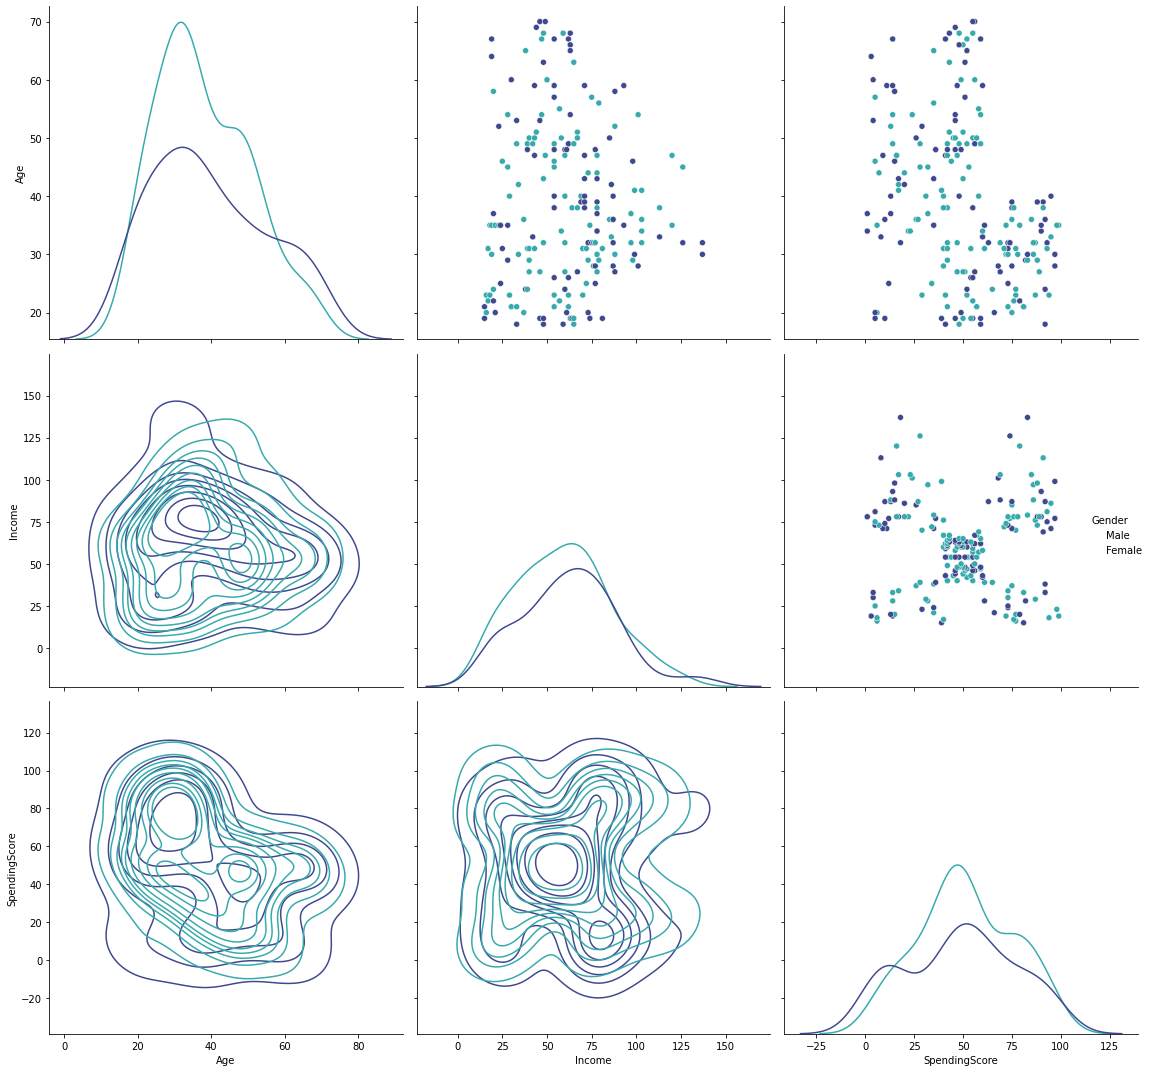

In [17]:
def showPairPlot(df: pd.Series):
    pairplot = sns.PairGrid(df, hue = "Gender", height = 5,  palette = 'mako')
    pairplot.add_legend()
    pairplot.map_upper(sns.scatterplot)
    pairplot.map_diag(sns.kdeplot)
    pairplot.map_lower(sns.kdeplot, lw = 1)
    plt.tight_layout()
    
showPairPlot(customer_set)


**Висновки з 1-4 завдання (детальні)**

1.Данный датафрейм состоит из 5 атрибутов(если учитывать изначальный набор): CustomerID - id посетителя, Gender- гендер, Age - возраст , Income - доход, SpendingScore - оценка расходов. Размерность выборки 200 x 5.В выборке отсутствуют пропущенные значения.

2.Во втором задание удалили атрибут CustomerId , так как он не несёт в себе никакую нужную нам информацию.

3.Потроил графики распределения по переменным Age, Income и SpendingScore.Больше всего посетителей возрастом 32 года, показатель дохода самые популярные значения (54 и 78) и больше всего посетителей посетило торговый центр с SpendingScore = 42.В целом можно сделать вывод, что у большинства клиентов оценка расходов находится в диапазоне от 35 до 60. Интересно, что есть клиенты, у которых тоже есть оценка расходов, а также оценка расходов 99, что показывает, что торговый центр обслуживает самых разных клиентов с различными потребностями и требованиями.

4.Построил pairplot графики на которых отчётливо видно зависимость между переменной отвечающей за гендер(Gender) относительно переменных Age, Income и SpendingScore.На каждом scatterplot видно что женщин больше чем мужчин.У большинства людей Spending score = 50, при значение income в диапозоне от 25 - 75.  


**Завдання 5** 

Проаналізувати змінну `Gender`:
* вивести співвідношення по статям;
* побудувати `countplot` по `Gender`;  
* побудувати `pie`по `Gender'.  

In [18]:
customer_set['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

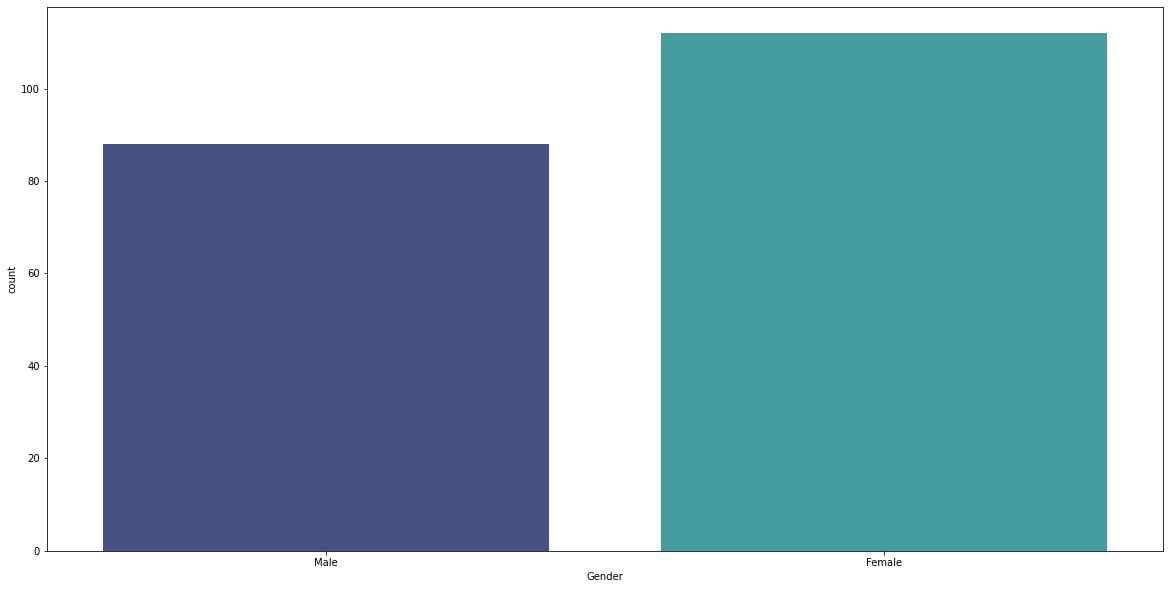

In [19]:
fig = plt.figure(figsize=(20, 10))
sns.countplot(customer_set.Gender, palette = "mako")

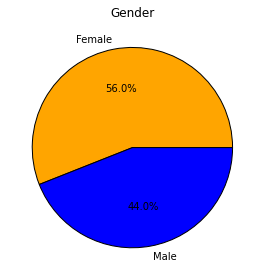

In [20]:
slices = customer_set['Gender'].value_counts()
labels = ['Female', 'Male']
colors = ['orange', 'blue']
plt.pie(slices, labels = labels, colors = colors, wedgeprops = {'edgecolor': 'black'},  autopct='%.1f%%')
plt.title('Gender')
plt.tight_layout()
plt.show()

**Завдання 6** 

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінних `Age` та `Income` відносно змінної `Gender` з різними параметрами:
*  подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`.

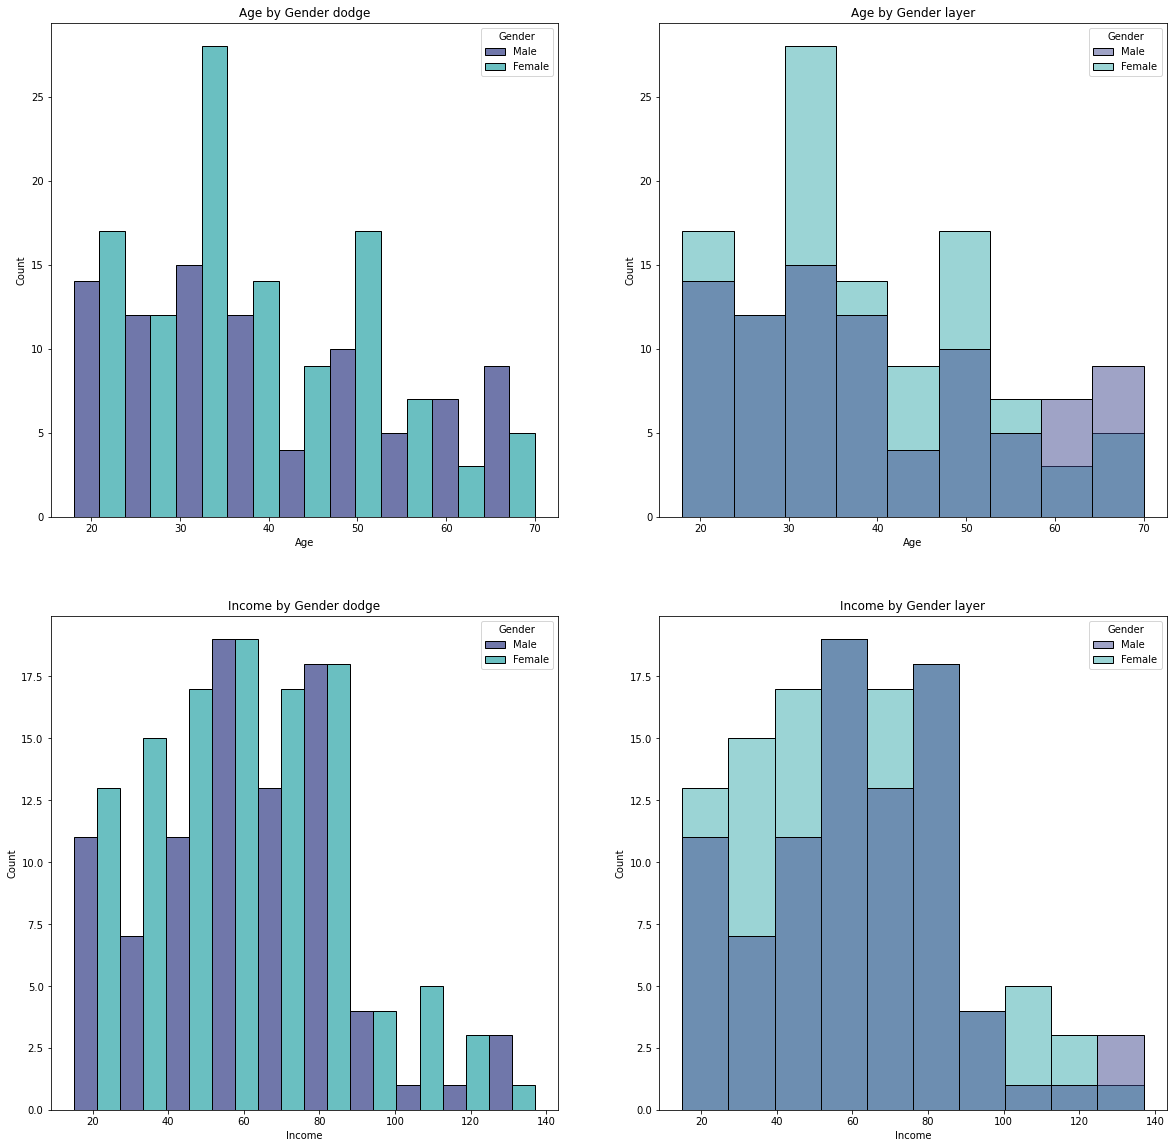

In [39]:
f, ax = plt.subplots(2,2,figsize=(20,20))
sns.histplot(x='Age',data=customer_set, hue='Gender',ax=ax[0,0], multiple='dodge',palette = "mako")
ax[0,0].set_title('Age by Gender dodge')
sns.histplot(x='Age',data=customer_set, hue='Gender',ax=ax[0,1], multiple='layer',palette = "mako")
ax[0,1].set_title('Age by Gender layer')

sns.histplot(x='Income',data=customer_set, hue='Gender', ax=ax[1,0], multiple='dodge',palette = "mako")
ax[1,0].set_title('Income by Gender dodge')
sns.histplot(x='Income',data=customer_set, hue='Gender', ax=ax[1,1], multiple='layer',palette = "mako")
ax[1,1].set_title('Income by Gender layer')

plt.show()

**Завдання 7** 

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінної `SpendingScore` відносно змінної `Gender` з різними параметрами:  
* подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`. 



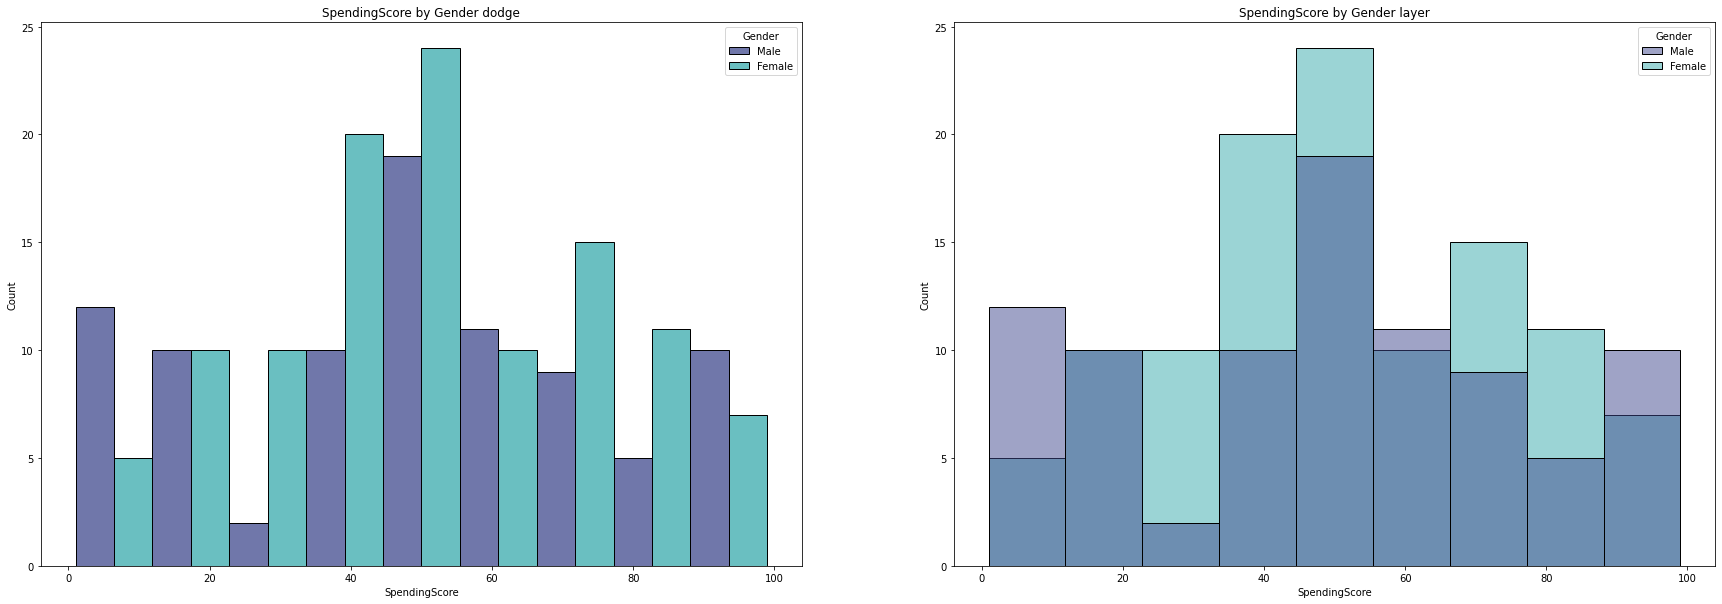

In [41]:
f, ax = plt.subplots(1,2,figsize=(30,10))
sns.histplot(x='SpendingScore',data=customer_set, hue='Gender',ax=ax[0], multiple='dodge', palette = "mako")
ax[0].set_title('SpendingScore by Gender dodge')
sns.histplot(x='SpendingScore',data=customer_set, hue='Gender',ax=ax[1], multiple='layer',palette = "mako")
ax[1].set_title('SpendingScore by Gender layer')

plt.show()

**Завдання 8** 

Побудувати `boxplot` по змінній `SpendingScore` і подивитись як відрізняються витрати відностно змінної `Gender`. 

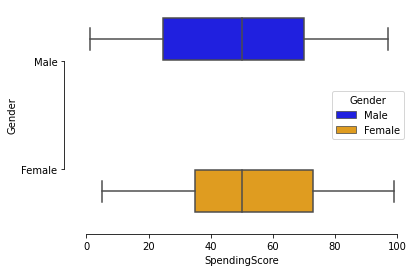

In [27]:
sns.boxplot(x = customer_set['SpendingScore'], 
            hue = customer_set['Gender'], palette=["blue","orange"],
            data = customer_set,
            y = customer_set['Gender']
           )
sns.despine(offset=10, trim=True)

**Висновки з завдання 5 - 8(детальні)**

1.   Яке співвідношення груп чоловіків та жінок?

В процентном соотношение количество мужчин почти равно количеству женщин 44% vs 56%.

2.  Подивитись які можна виділити групи і як розподілені витрати відностно статі людини? 

Можно распределить людей на группы , а именно: работающие люди среднего возраста которые много трятят , люди пожилого возраста траты которых с возрастом уменьшаются. Графики Spending Score относительные Gender распределены биноминально.

3. Чи є різниця між витратами у чоловіків та жінок?

На графиках видно что женщины тратят чаще нежели мужчины и Spending score у них выше в диапозоне от 40 - 75 исходя из построеного boxplot. Но мужчины зарабатывают больше.

## K-means Method ##

**Завдання 9** 

Як Ви могли помітити, вибірка, з якою ми працюємо, не містить ключової зміної з вірними мітками. Тому перед початком кластерування необхідно визначити (підібрати) оптимальну кількість кластерів на яке буде проведено розбиття. Для цього необхідно:
1. видалити змінну `Gender`, тому що ... **Чому?**;  
2. задати мінімальну та максимальну кількість кластерів самостійно;  
3. На прикладі алгоритму [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), для ознайомлення з тим як працювати в умовах коли кількість кластерів невідома заздалегіть і немає вірних міток з позначками до якого кластеру відноситься спостереження пропонується використати метод [Elbow](https://coderoad.ru/19197715/Scikit-Learn-K-Means-Elbow-criterion) (додаткові джерела: [article_1](https://medium.com/analytics-vidhya/elbow-method-of-k-means-clustering-algorithm-a0c916adc540#:~:text=K%2Dmeans%20clustering%20is%20an,cluster%20with%20the%20nearest%20centroid.), [article_2](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/))

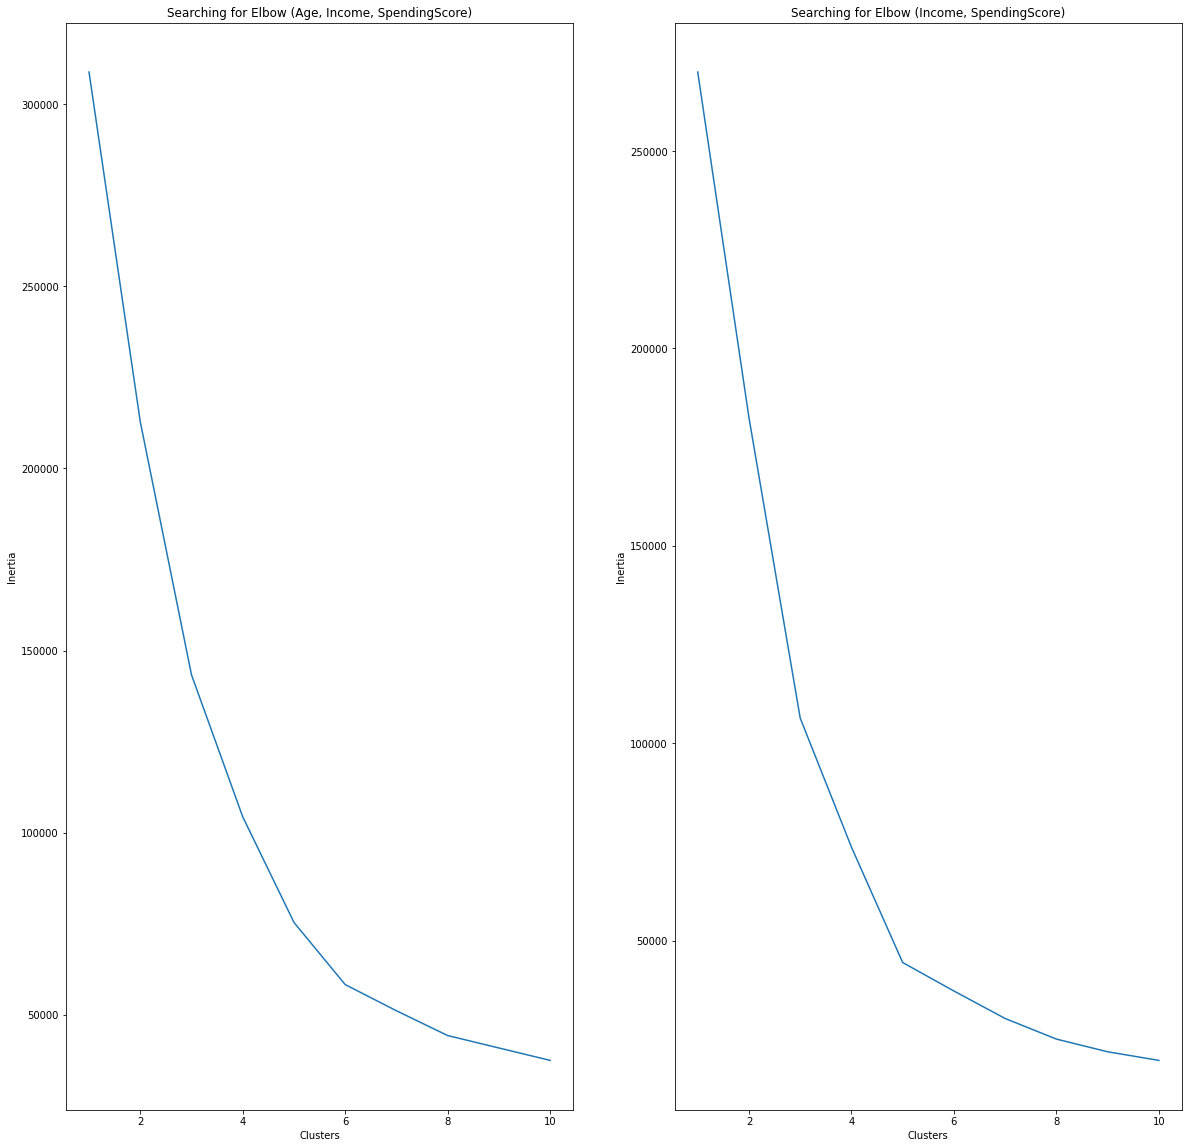

In [28]:
X1 = customer_set.drop(['Gender'], axis=1)
X2 = X1[['Income','SpendingScore']]
clusters = list(range(1, 11))

inertias = [KMeans(n_clusters=k).fit(X1).inertia_ for k in clusters]

f, ax = plt.subplots(1,2,figsize=(20,20))
sns.lineplot(x=clusters, y=inertias, ax=ax[0])
ax[0].set_title('Searching for Elbow (Age, Income, SpendingScore)')
ax[0].set_xlabel('Clusters')
ax[0].set_ylabel('Inertia')

inertias = [KMeans(n_clusters=k).fit(X2).inertia_ for k in clusters]

sns.lineplot(x=clusters, y=inertias, ax=ax[1])
ax[1].set_title('Searching for Elbow (Income, SpendingScore)')
ax[1].set_xlabel('Clusters')
ax[1].set_ylabel('Inertia')

plt.show()

**Висновки з завдання 9 (детальні)** 

1.  Необхідно навести яка кількість кластерів на Вашу думку є оптимальною (краще розглянути для порівняння делька гіпотез про кількість кластерів)
2.Удалил атрибут Gender так как он категориальный и никак не влияет на количество кластеров.   
3.По моему мнению оптимальное количество кластеров должно = 5, из-за того что на графике на отметке = 5 идёт плавный спуск(оипарался на ссылки которые были которые вели на метод Elbow). 

**Завдання 10** 

Зробити двовимірну візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи змінні `Income` та `SpendingScore`. 

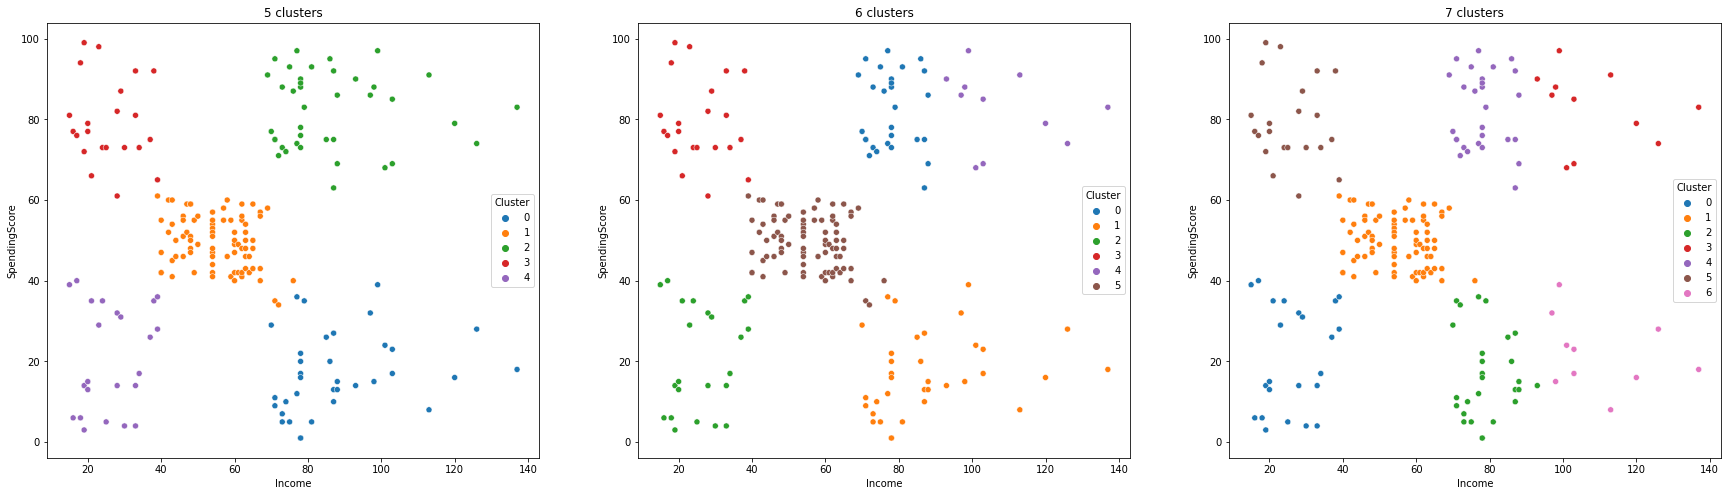

In [29]:
data = customer_set[['Income','SpendingScore']]

f, ax = plt.subplots(1,3,figsize=(30,8))
for k, ax in zip(range(5,8), ax):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(data)
    data['Cluster'] = kmeans.predict(data)
    
    sns.scatterplot(data=data, x='Income', y='SpendingScore', hue='Cluster', palette='tab10', ax=ax)
    ax.set_title(f"{k} clusters")

plt.show()

**Завдання 11** 

Зробити візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи [scatter_3d](https://plotly.com/python/3d-scatter-plots/).

In [30]:
def displayCuster3D(df: pd.Series):
    for i in range(5,8,2):
        kmeans = KMeans(n_clusters = i)
        kmeans.fit(data)
        df['Cluster'] = kmeans.predict(df)

        fig = px.scatter_3d(df, x='Income', y='SpendingScore', z='Age', color="Cluster")
        fig.show()
    
data = customer_set[['Income','SpendingScore', 'Age']]
displayCuster3D(data)

**Висновки з завдання 10 - 11 (детальні)** 

1. Визначитась з отриманих візуалізацій яка кількість кластерів є оптимальною на Вашу думку і провести аналіз кластерів, що Ви отримали.
2. Проанализировав 2d и 3d графики, понял что оптимальное количество кластеров должно быть равное 5, ибо когда кластеров становиться больше то данные в некоторых местах вроде бы как относяться к одной группе но находяться в разных кластерах.На 2d графике видно что при количестве кластеров которое я выбрал график смотриться нормально , все данные распределены кучно, в отличие от других графиков , где один кластер распределён близко к другому кластеру. 

## Agglomerative clustering ##

Розглянемо ще один підхід до кластеризації - [агломеративну ієрархічну кластеризацію](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

**Завдання 12** 

Кластеризуйте датасет за допомогою [агломеративної ієрархічнуої кластеризації](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

Мінімально необхідні параметри, що треба налаштувати:  
* `n_clusters`: параметр, який відповідає за кільксіть кластерів на яку буде проведено розбиття вибірки;  
* `linkage`: параметр зв’язку. Цей параметр визначає, яку відстань використовувати між наборами спостережень.
* перевірте як працює цей метод з різними параметрами `linkage`  
* після кожної зміни параметрів - візуалізувати розбиття на кластери

Розрахувати матрицю відстаней для нашого набору даних:
* за допомогою методу [hierarchy.linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) і матриці відстаней кластеризувати дані з різними значеннями параметра `method`
* за допомогою методу [hierarchy.dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) візуалізувати отримані результати кластеризації у вигляді дендрограм


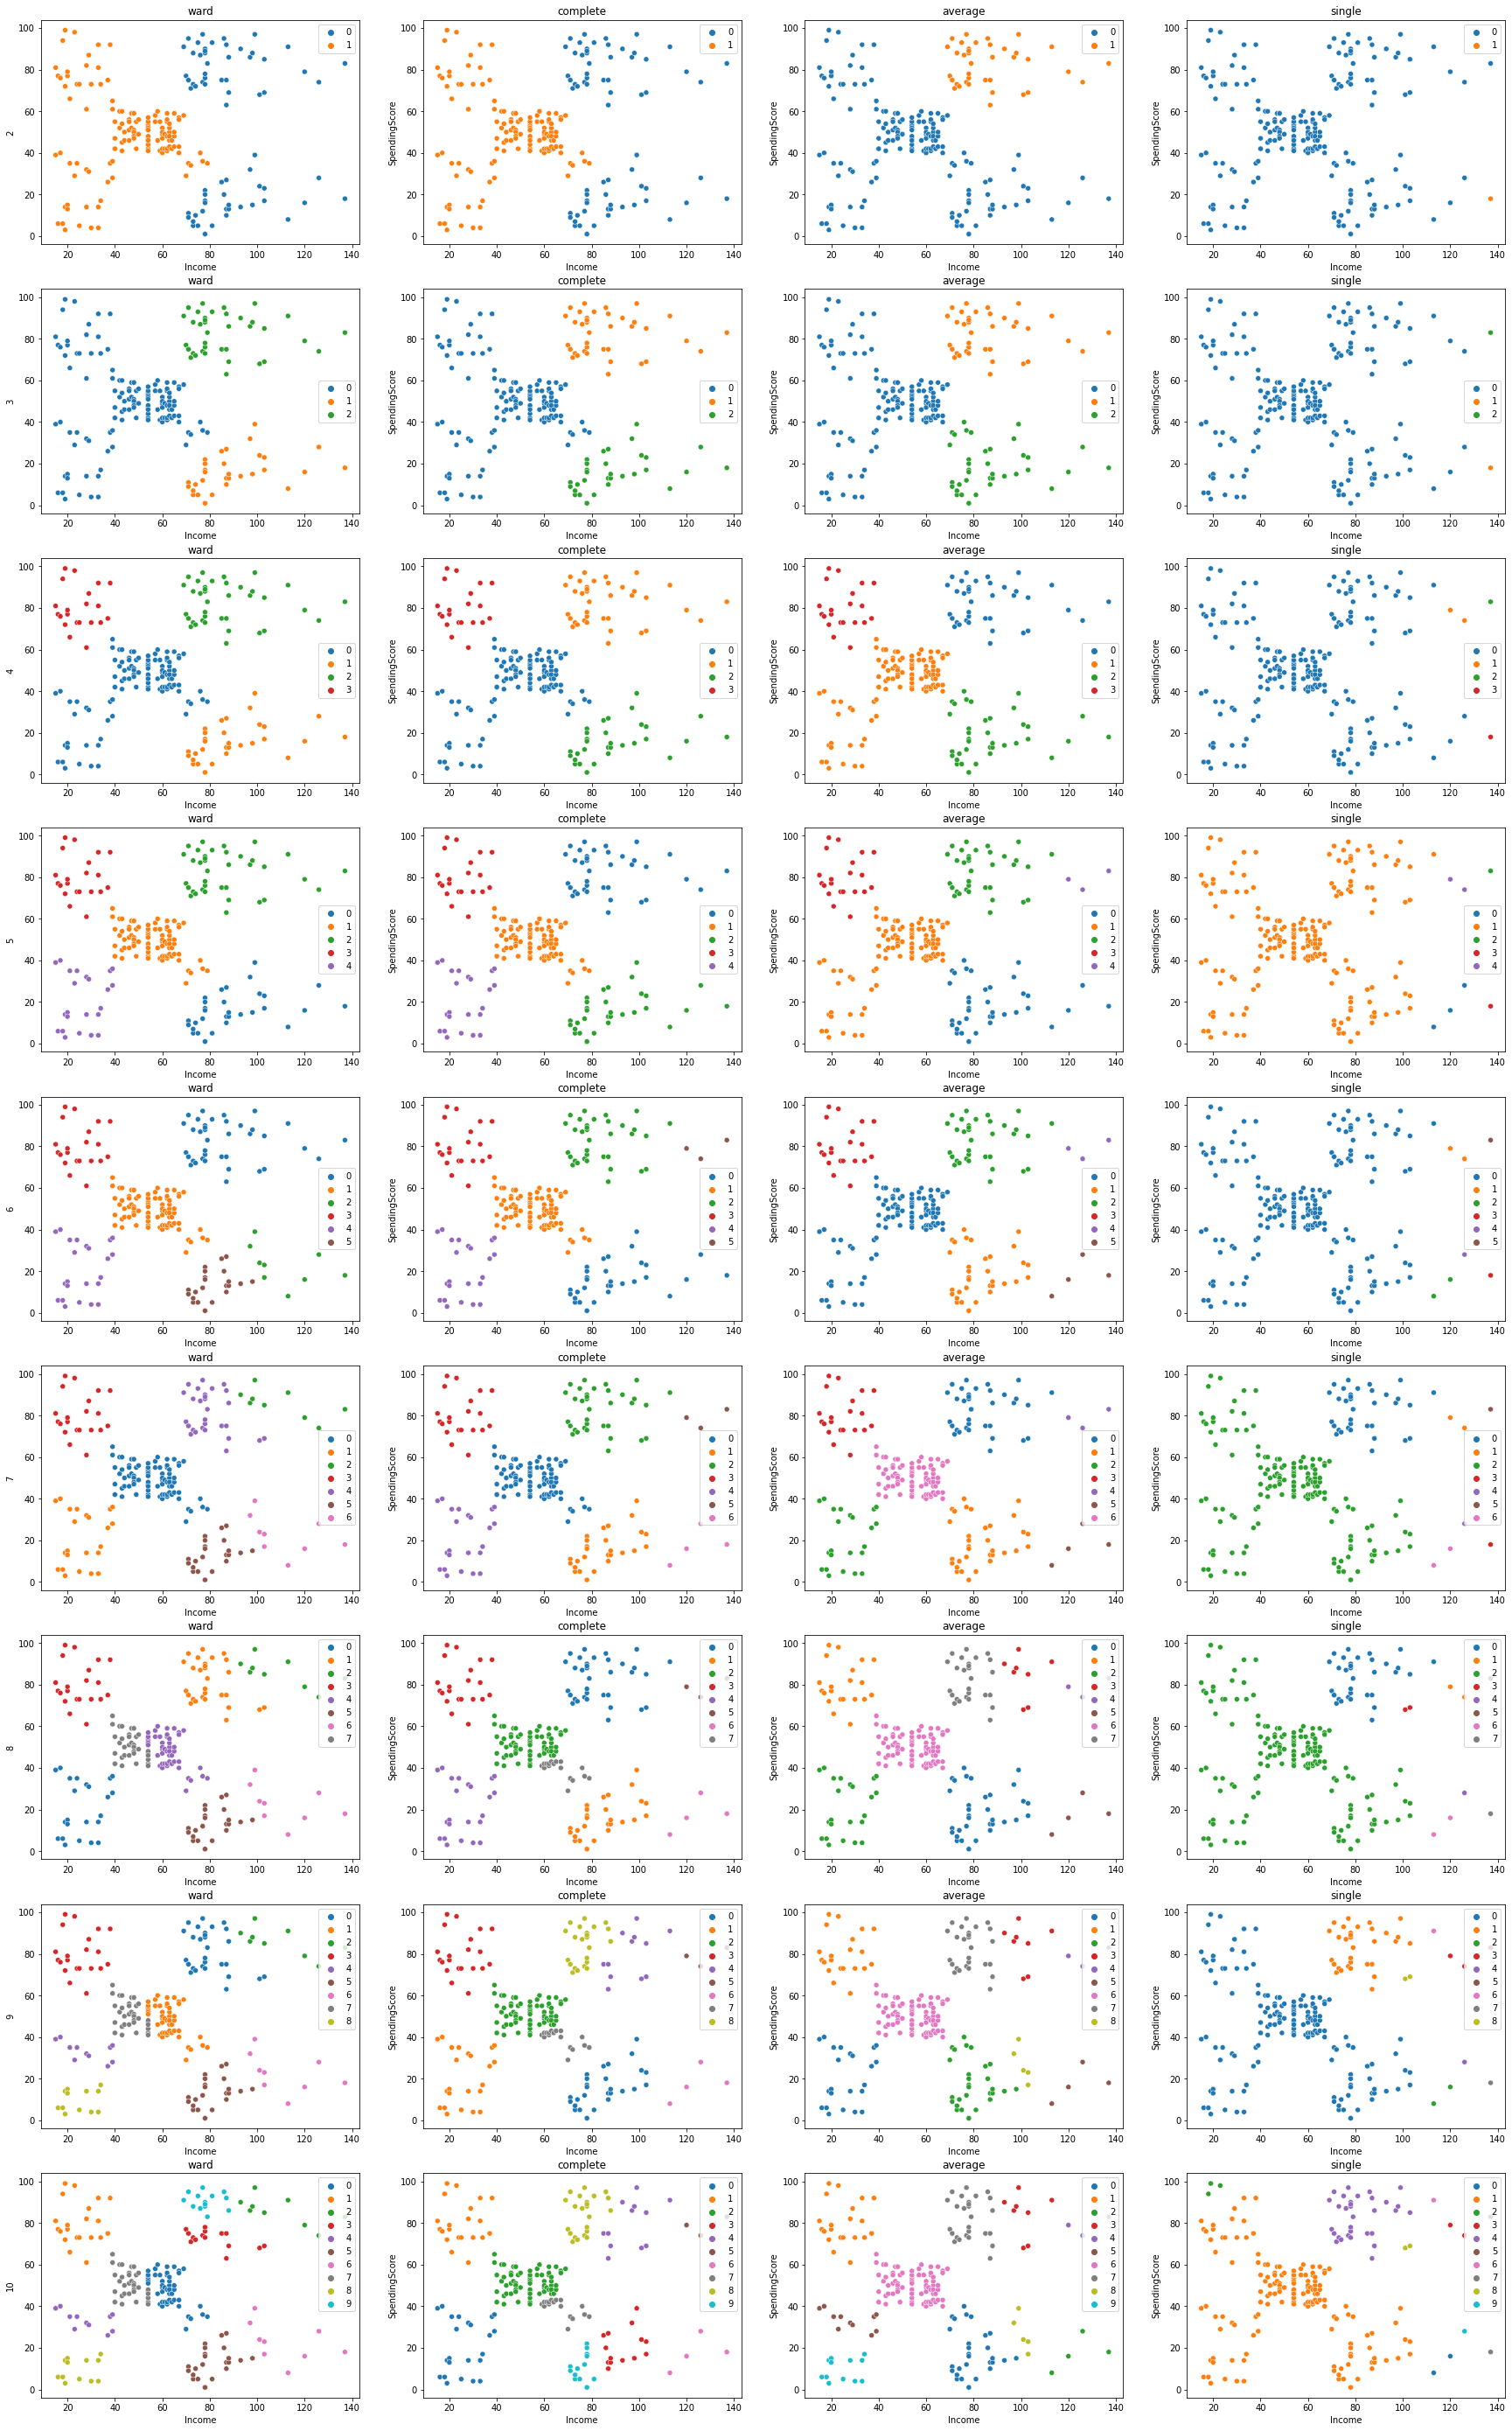

In [31]:
data = customer_set[['Income','SpendingScore']]
clusters = list(range(2,11))
linkageParams = ['ward', 'complete', 'average', 'single']
rows = len(clusters)
cols = len(linkageParams)

f, ax = plt.subplots(rows,cols,figsize=(30,50))

for k, row in zip(clusters, range(rows)):
    for linkage, col in zip(linkageParams, range(cols)):
        algo = AgglomerativeClustering(n_clusters=k, linkage=linkage)
        cluster = algo.fit_predict(data)
        sns.scatterplot(data=data, x = 'Income', y='SpendingScore', hue=cluster,  palette ='tab10', ax=ax[row,col])
        ax[row,col].set_title(linkage)
    ax[row,0].set_ylabel(k)
        
plt.show()

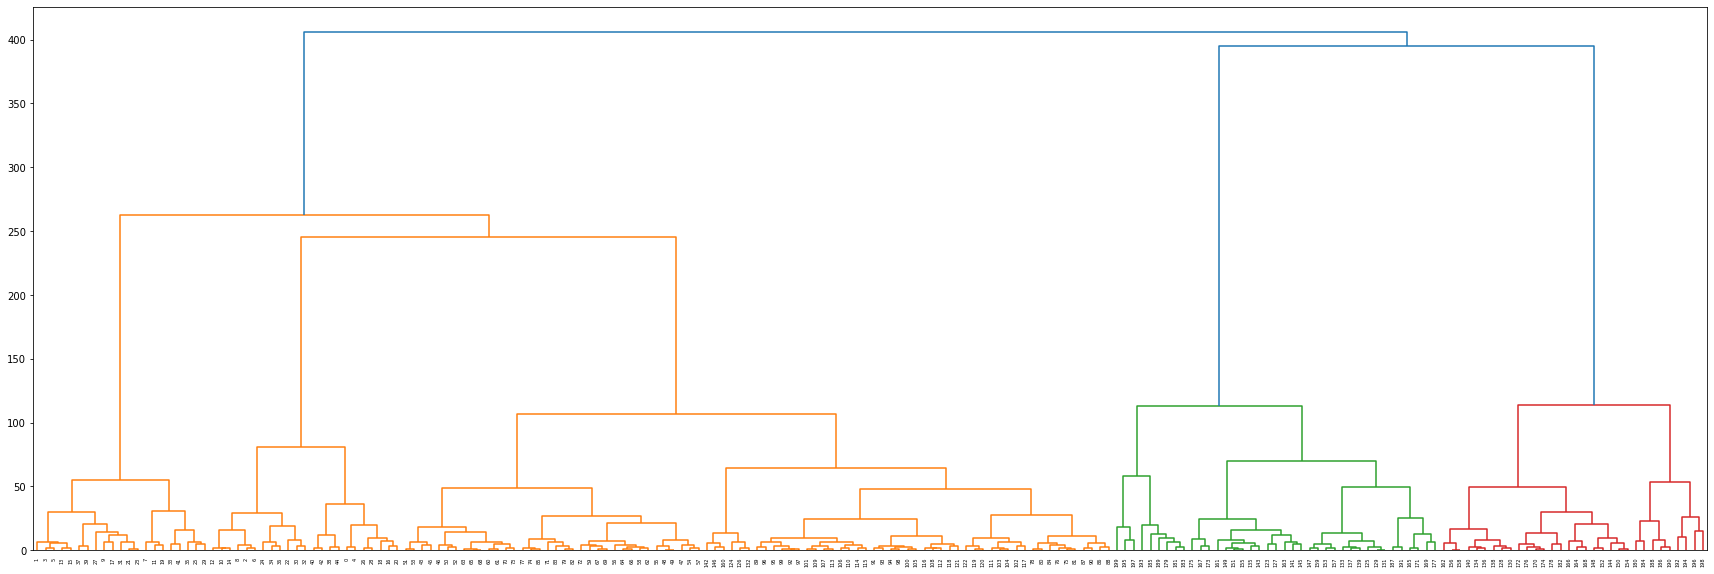

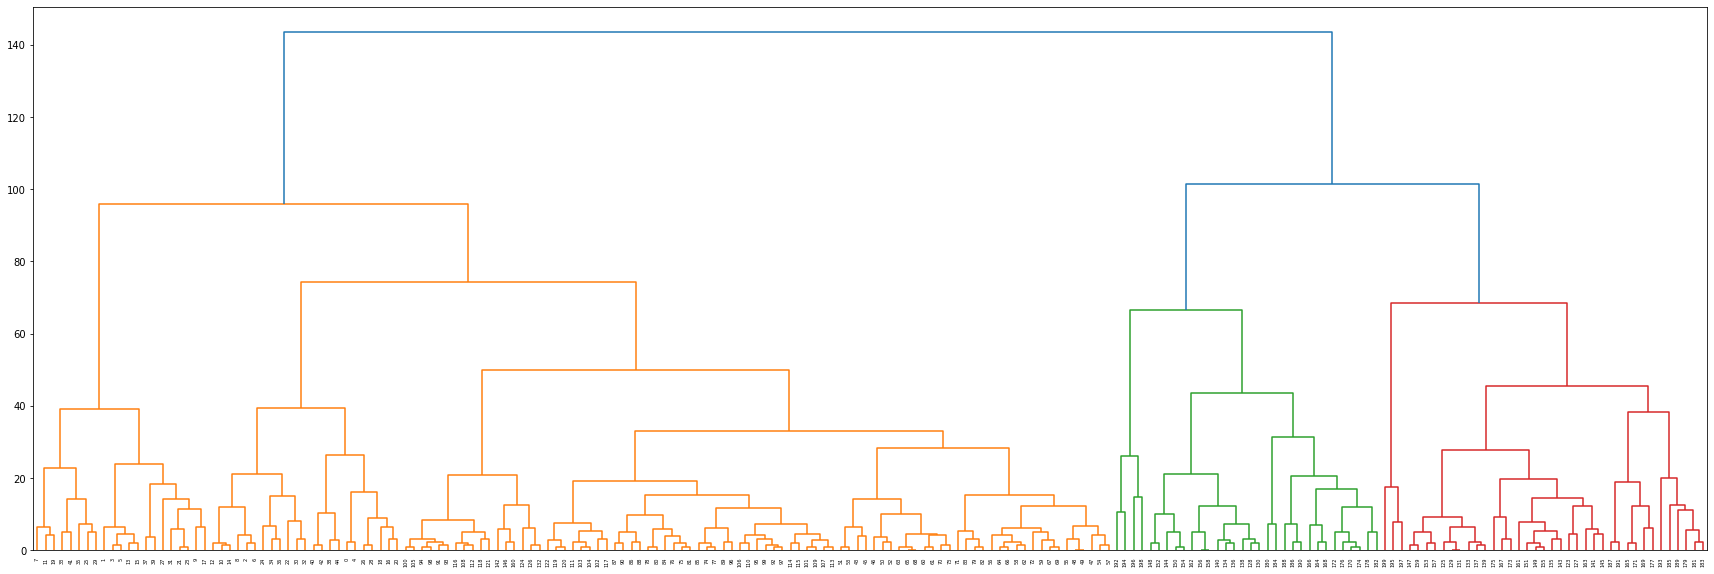

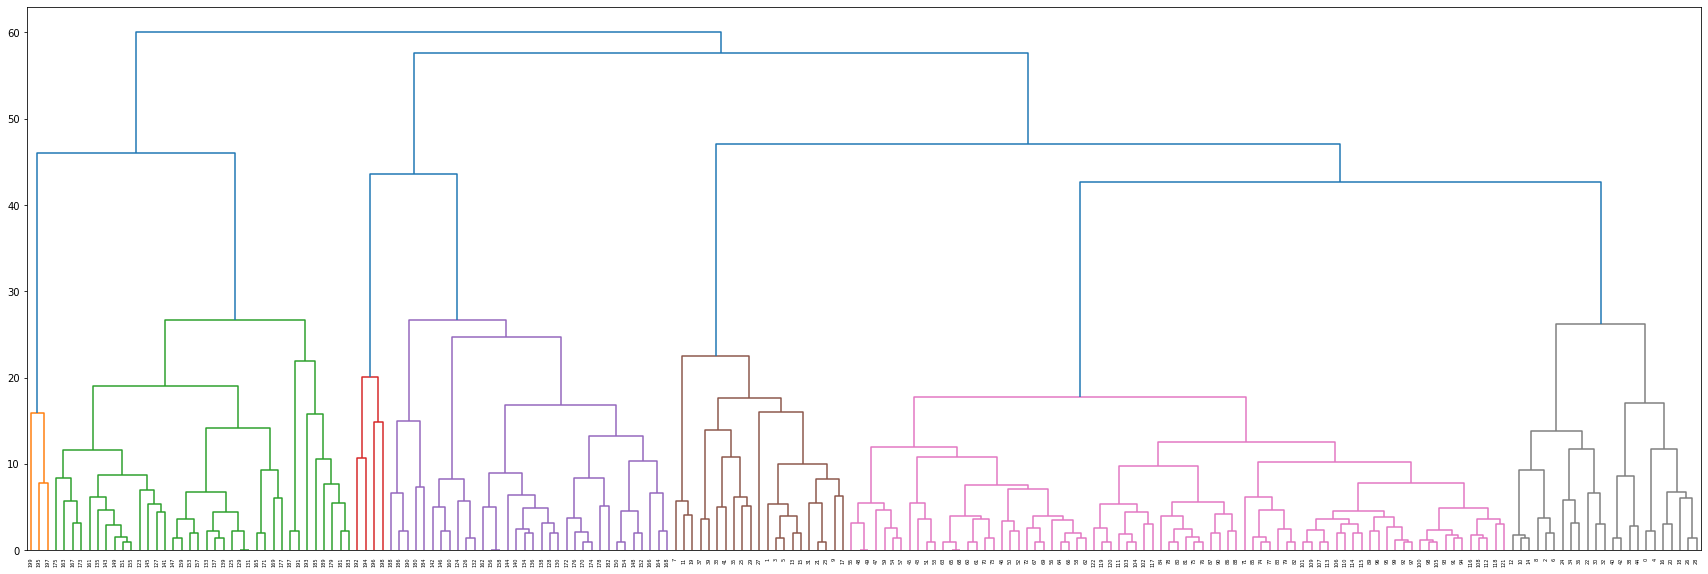

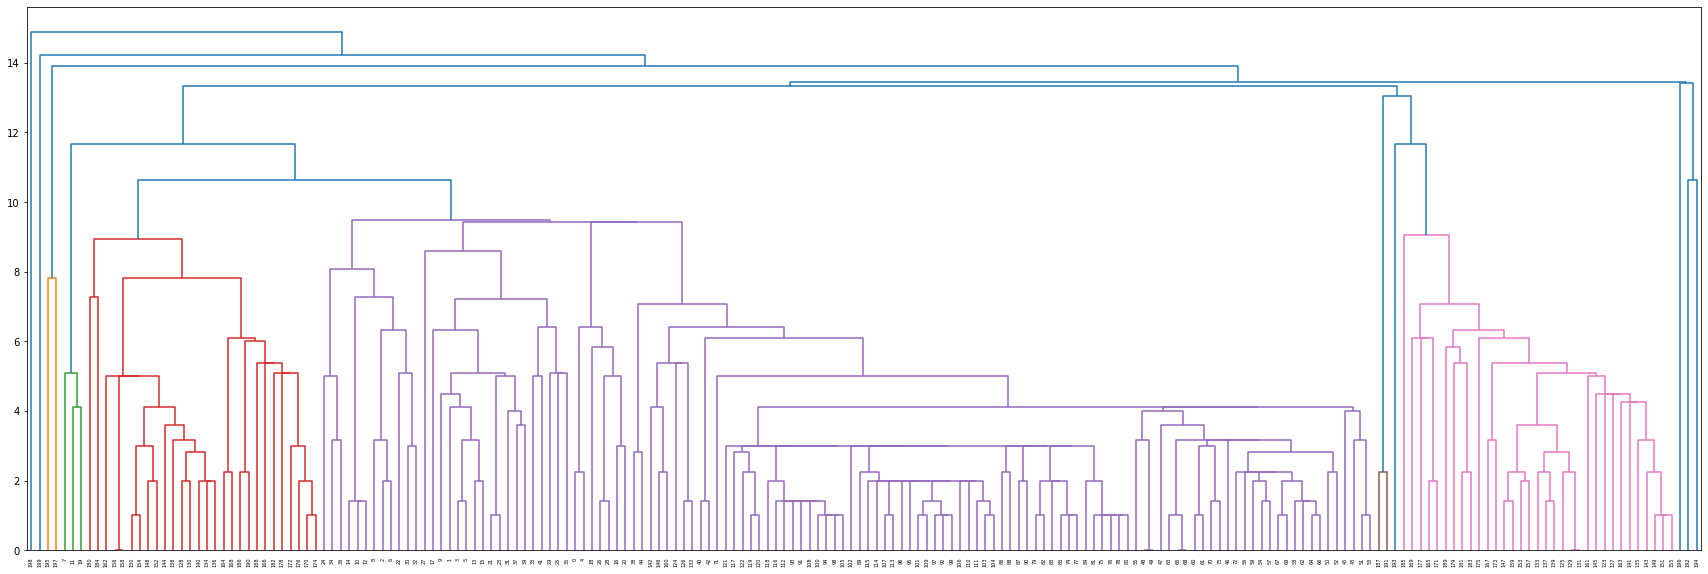

In [35]:
from scipy.cluster.hierarchy import dendrogram, linkage
for param in linkageParams:
    fig = plt.figure(figsize=(30, 10))
    dendrogram(linkage(data, param))
    plt.show()       

**Висновки з завдання 12 (детальні)**

1. С помощью агломиративной иерархической кластеризации построил графики.Для построения графиков был использован параметр linkage , так званный параметр связи который в данном случае использовался для расстояния между наборами наблюденей, также парметр n_clusters , который отвечал за количество кластеров на которое будет проведено разбиение выборки(в моём случае от 2-11).
2.Построил дендограммы используя метод dendrogram в который подставил необходимые параметры linkage и linkageParams = 'ward', 'complete', 'average', 'single'
3.Исходя из полученных графиков, параметры complete и ward  являются оптимальными, ибо они в похожей манере отображают распределение кластеров как и 3d и 2d графики которые были построенны в преведущем задание.

**Завдання 13** 

А тепер зробимо порівняльний аналіз отриманих результатів кластеризації розглянутими методами:  
* В фінальних візуалізаціях треба використовувати **однакову** (на вашу думку оптимальну) кількість кластерів!!!  

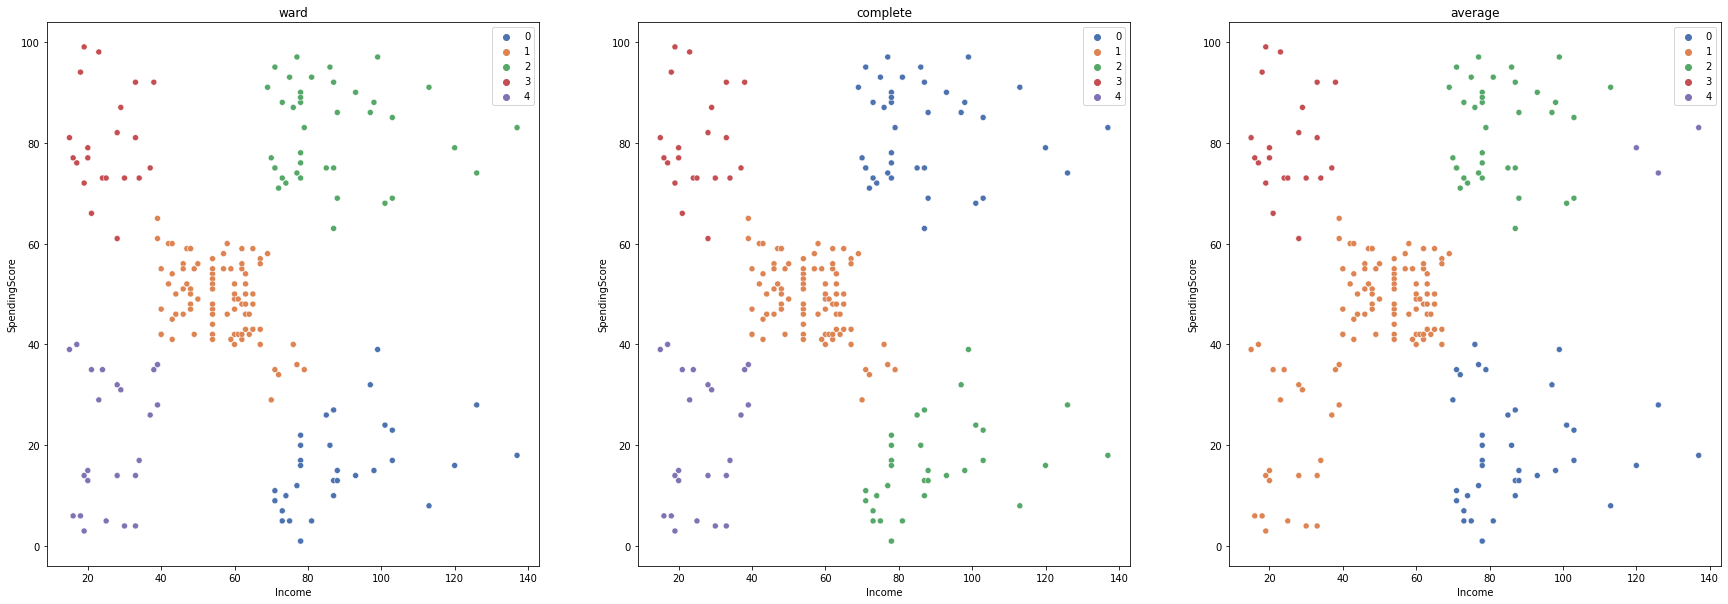

In [36]:
f, ax = plt.subplots(1,3,figsize=(30,10))
for param, ax in zip(linkageParams, ax):
    algo = AgglomerativeClustering(n_clusters=5, linkage=param)
    cluster = algo.fit_predict(data)
    sns.scatterplot(data=data, x = 'Income', y='SpendingScore', hue = cluster,  palette ='deep', ax=ax)
    ax.set_title(param)
plt.show()

**Висновки з завдання 13 (детальні)**

1.В принципе я думаю оптимальное количество кластеров должно =  5.В данной работе было проведенно много гипотез по поводу оптимального количества кластеров и на протяжение всей аналитики именно данное количество кластеров показывало самый стабильный результат, хотя я под конец заметил что в принципе количество равное 6-7 тоже может подойти.